## Collab-Filtering

Считываем данные и файла

In [2]:
import pandas as pd

df_buyed = pd.read_csv('df_buyed_orders.csv', sep=';')
df_buyed.head()

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4819,3759.0,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",...,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,ИнтернетДоставка,NaN
1,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3325,3325.0,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,...,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,ИнтернетДоставка,NaN
2,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528.0,Магазины,Безналичная,Ижевск,ИГРУШКИ,...,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,ИнтернетДоставка,NaN
3,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1196.0,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,3,1,01.03.2017 0:00,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025316250,ИнтернетДоставка,NaN
4,01.03.2017 9:02,03.03.2017 0:00,3999713_TR,Доставлен,1196,1196.0,Магазины,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",...,49,2,1,01.03.2017 0:00,55574948-52515357485779,111117_ou25@yandex.ru,Ольга,IDL00025320553,ИнтернетДоставка,NaN


In [3]:
df_buyed.dropna(subset=['Группа4'], inplace=True) #отбрасываем все, которые не заполнены 

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

dff = df_buyed.sample(frac=1).copy() #перемешиваем, чтобы разделение получилось не сгрупированным по одному клиенту 
dff[['Количество', 'Телефон_new', 'Группа4']]

,Количество,Телефон_new,Группа4
129922,1,55574954-53545657515379,игрушки для песка/снега
200724,1,55575054-56565248515578,салфетки
10500,1,55574856-50514855574971,книги для малышей
208912,1,55574954-52505152545471,колготки
143955,1,55575054-48504852505178,освежители воздуха
...,...,...,...
138904,1,55574857-54485454485270,подгузники прочие
193012,1,55574950-54485350555173,каши натуральные
97874,1,55575650-53555357505375,аксессуары для кукол
103132,1,55575055-48494857515671,боди


Разделяем выбор на train и test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dff, dff['Количество'], test_size=0.01, random_state=43)

После разбиения запоминаем индексы, по которым нужно будет заменить количество на 0 

In [6]:
mask_items = X_test[['Количество', 'Телефон_new', 'Группа4']]
# for i in mask_items:
index_to_0 = []
for index, row in mask_items.iterrows():
    index_to_0.append(index)

Сделали проверку, как раз все эти значения были заменены на 0

In [7]:
dff.loc[index_to_0, 'Количество'] = 0
dff.loc[index_to_0, ['Количество', 'Телефон_new', 'Группа4']]

,Количество,Телефон_new,Группа4
106320,0,55574954-56505452525378,"15-36 кг (автокресла, бустеры)"
51091,0,55575049-55535455555177,наборы игровые
6458,0,55575451-54525050575478,футболки
64748,0,55574948-51565048505476,подгузники
97958,0,55574954-48555049495076,пластиковые машины
...,...,...,...
192757,0,55574954-55495249484879,каши натуральные
215335,0,55574853-53555549555175,пюре мясные
62123,0,55575048-57555355525473,сандально-туфельная группа
195126,0,55575054-55555753574973,подгузники


### Строим сводную таблицу вида: группа4 $*$ клиент

In [9]:
pivot_item = pd.pivot_table(dff, values="Количество", index=['Телефон_new'], columns=['Группа4'],  fill_value=0)
pivot_item.head(10)

Группа4,0-13 кг (люльки-переноски),0-18 кг (автокресла),"15-36 кг (автокресла, бустеры)",9-36 кг (автокресла),АКСЕССУАРЫ ДЛЯ КОЛЯСОК,КОЛЯСКИ ЕВРОПА,КОЛЯСКИ КИТАЙ,КОЛЯСКИ ЛИТВА,КОЛЯСКИ ПОЛЬША,Новый год - сувенирная продукция,...,щетки зубные,"щетки, расчески",щипчики,электрические зубные щетки,электромобили,электронные игры,энциклопедии,юбки,ящики РОССИЯ,ящики прочие
Телефон_new,,,,,,,,,,,,,,,,,,,,,
0,0,1,0.0,1,1.0,1.0,1.0,0,1,0,...,1.0,1,0,0,0,1.0,0.0,1.0,1,1.0
32555749-545749525150 .,0,0,0.0,0,0.0,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0.0,1.0,0.0,0,0.0
55494851-56495152535476,0,0,0.0,0,0.0,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0
55574848-48485149515175,0,0,0.0,0,0.0,0.0,0.0,0,1,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0
55574848-48485149515377,0,0,0.0,0,0.0,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0
55574848-48494948544878,0,0,0.0,0,0.0,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0
55574848-48495057545270,0,0,0.0,0,0.0,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0
55574848-48504851505372,0,0,0.0,0,0.0,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0
55574848-48504852495679,0,0,0.0,0,0.0,0.0,0.0,0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0


In [10]:
X = pivot_item.T # Транспанируем для дальнейшего удобства и смотрим, что получилось
X.head(5)

Телефон_new,0,32555749-545749525150 .,55494851-56495152535476,55574848-48485149515175,55574848-48485149515377,55574848-48494948544878,55574848-48495057545270,55574848-48504851505372,55574848-48504852495679,55574848-48504951495271,...,55575757-57565749535776,55575757-57575157534871,55575757-57575550565076,55575757-57575749495077,55575757-57575751494871,56575053-49545153535383,56575454-48485156545486,56575655-52525750505484,57484948-48505057565793,57495452-49485054525597
Группа4,,,,,,,,,,,,,,,,,,,,,
0-13 кг (люльки-переноски),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0-18 кг (автокресла),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"15-36 кг (автокресла, бустеры)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9-36 кг (автокресла),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
АКСЕССУАРЫ ДЛЯ КОЛЯСОК,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn.neighbors import NearestNeighbors


knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(X.values)
distances, indices = knn.kneighbors(X.values, n_neighbors=200)

Делаем проверку

In [24]:
X.columns.tolist().index('0')

0

In [6]:
df_buyed[df_buyed['Группа4'] == 'накидка']['Группа4']

50444    накидка
Name: Группа4, dtype: object

In [19]:
distances

array([[0.00000000e+00, 9.44819757e-01, 9.47710119e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 9.68455985e-01, 9.76912145e-01, ...,
        9.97073547e-01, 9.97108289e-01, 9.97140774e-01],
       [0.00000000e+00, 9.43432796e-01, 9.81200134e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 8.56087141e-01, 8.82397610e-01, ...,
        9.95823976e-01, 9.95867026e-01, 9.95872958e-01],
       [2.22044605e-16, 9.23387953e-01, 9.49216328e-01, ...,
        9.95983222e-01, 9.96028654e-01, 9.96028810e-01],
       [2.22044605e-16, 9.23387953e-01, 9.50095022e-01, ...,
        9.94515937e-01, 9.94760221e-01, 9.94810237e-01]])

In [467]:
indices

array([[  0,   8, 179, ..., 394, 151, 104],
       [  1, 229,  13, ...,  60, 179, 319],
       [  2,  13, 235, ..., 137, 279, 270],
       ...,
       [396, 255, 369, ..., 204,  94, 383],
       [397, 398, 268, ..., 199, 110,  97],
       [398, 397, 296, ..., 314,  49, 383]], dtype=int64)

In [469]:
X.index[114]

'книги для малышей'

In [470]:
# получаем индекс для продукта 'прочие игрушки для развития'
index_for_product = X.index.tolist().index('прочие игрушки для развития')
# находим индексы для похожих товаров 
sim_products = indices[index_for_product].tolist()
# считаем косиннусное сходство между 'прочие игрушки для развития' и остальными товарами
product_distance = distances[index_for_product].tolist()
# находим позицию нашего продукта, чтобы в дальнейшем его удалить
id_product = sim_products.index(index_for_product)
sim_products.remove(index_for_product)
product_distance.pop(id_product)
print('The Nearest product to прочие игрушки для развития:', sim_products)
print('The Distance from прочие игрушки для развития:', product_distance)

The Nearest product to прочие игрушки для развития: [93, 249, 260, 95, 197, 325, 114, 154, 203, 301, 181, 205, 106, 251, 82, 355, 96, 155, 281, 94, 28, 263, 190, 236, 134, 189, 69, 356, 339, 277, 222, 359, 270, 347, 97, 191, 299, 262, 52, 265, 368, 124, 289, 369, 63, 31, 66, 319, 167, 245, 219, 34, 227, 296, 271, 116, 309, 285, 314, 238, 87, 110, 329, 255, 207, 274, 193, 286, 161, 29, 264, 26, 74, 111, 294, 278, 273, 187, 130, 292, 378, 326, 206, 388, 151, 172, 81, 208, 18, 23, 50, 137, 311, 141, 16, 360, 91, 394, 237]
The Distance from прочие игрушки для развития: [0.7778055502407742, 0.7883236795997985, 0.7905217329871829, 0.8173651652203034, 0.8233950286820975, 0.843689567903447, 0.8499027850954181, 0.8548019517882439, 0.8556790243389044, 0.8824192888847002, 0.8861950665672113, 0.8910654483494499, 0.8931341952384025, 0.8965686369766936, 0.9012806165511777, 0.9038149970677775, 0.9050934944245974, 0.9118578794762466, 0.9156000407261539, 0.9156971158479755, 0.9178138820544163, 0.921292

In [473]:
X.loc[X.index[sim_movies], '55574857-57555248485273'].values

array([1., 0., 0., 0., 1., 0., 1., 0., 0.])

In [474]:
(1 - np.array(movie_distances))

array([0.22395024, 0.21311887, 0.21094788, 0.18109196, 0.1810373 ,
       0.16262255, 0.15006142, 0.14604273, 0.14468705])

Считаем предсказание, какое количество товаров клиент бы купил 

In [475]:
np.dot(X.loc[X.index[sim_products], '55574857-57555248485273'].values, (1 - np.array(product_distance)))

0.7942675154305244

Считаем ошибку для нашего теста 

In [476]:
count = 0
predict_value = []
for index, row in mask_items.iterrows():
#     print(row['Телефон_new'], row['Группа4'])
#     print(value_calcul(row['Телефон_new'], row['Группа4']), row['Количество'])
    predict_value.append(value_calcul(row['Телефон_new'], row['Группа4']))
    count += 1
    if count % 1000 == 0:
        print(count)

1000
2000


In [477]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predict_value, mask_items['Количество'])
mse

2.8702722505888607

In [162]:
mask_items.iloc[1]

Количество                           1
Телефон_new    55575649-56525348535472
Группа4                       салфетки
Name: 180547, dtype: object

In [478]:
same_ = 0
for i in range(len(mask_items['Количество'])):
    if mask_items.iloc[i]['Количество'] >= 1 and predict_value[i] > 0.5:
        same_ += 1
#     print(mask_items.iloc[i]['Количество'], predict_value[i])

Смотрим на выборку и думаем как улучшить нашу ошибку

In [396]:
from sklearn.ensemble import IsolationForest

<BarContainer object of 1 artists>

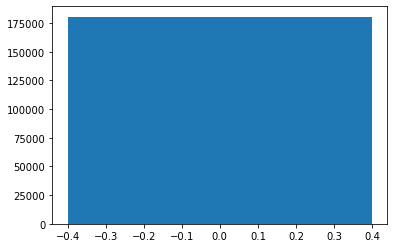

In [403]:
import matplotlib.pyplot as plt
outliers = IsolationForest(n_estimators=2000, random_state=0).fit_predict(df_buyed[['Количество']]) # fit 3 trees
outliers = (outliers+1)//2
df_isolation = df_buyed.loc[np.array(df_buyed.index)[outliers == 1]]
grupp_4 = np.array(df_isolation['Количество'].value_counts().sort_index())
plt.bar(np.arange(len(grupp_4)), grupp_4)

Заменяем количество купленных товаров на 1

In [331]:
dff2 = df_buyed.copy()

In [317]:
dff2['Количество'].where(dff2['Количество'] > 1, 1, inplace=True)

In [318]:
dff2['Количество'].values[dff2['Количество'].values > 1] = 1

In [319]:
dff2[dff2['Количество'] > 1]['Количество']

Series([], Name: Количество, dtype: int64)

In [320]:
X_train, X_test, y_train, y_test = train_test_split(dff2, dff2['Количество'], test_size=0.005, random_state=42)

In [321]:
y_test

166785    1
208289    1
197698    1
130022    1
72490     1
         ..
33790     1
61846     1
94477     1
103199    1
177825    1
Name: Количество, Length: 1036, dtype: int64

In [322]:
mask_items = X_test[['Количество', 'Телефон_new', 'Группа4']]
# for i in mask_items:
index_to_0 = []
for index, row in mask_items.iterrows():
    index_to_0.append(index)

In [323]:
dff2.loc[index_to_0, 'Количество'] = 0
dff2.loc[index_to_0, ['Количество', 'Телефон_new', 'Группа4']]

,Количество,Телефон_new,Группа4
166785,0,55575351-55515551505177,подгузники
208289,0,55575054-54485151545173,трусики-подгузники
197698,0,55575155-54545453515170,столовые приборы
130022,0,55575148-56495357495573,прочие игрушки для развития
72490,0,55574954-57555151485676,каши натуральные
...,...,...,...
33790,0,55575351-52545157535473,столовые приборы
61846,0,55575054-51575153485374,трусики-подгузники
94477,0,55575453-51565748505075,карнавал
103199,0,55574852-51575048554879,железные дороги


In [324]:
pivot_item = pd.pivot_table(dff2, values="Количество", index=['Телефон_new'], columns=['Группа4'],  fill_value=0)
pivot_item.head(10)

Группа4,0-13 кг (люльки-переноски),0-18 кг (автокресла),"15-36 кг (автокресла, бустеры)",9-36 кг (автокресла),АКСЕССУАРЫ ДЛЯ КОЛЯСОК,КОЛЯСКИ ЕВРОПА,КОЛЯСКИ КИТАЙ,КОЛЯСКИ ЛИТВА,КОЛЯСКИ ПОЛЬША,Новый год - сувенирная продукция,...,щетки зубные,"щетки, расчески",щипчики,электрические зубные щетки,электромобили,электронные игры,энциклопедии,юбки,ящики РОССИЯ,ящики прочие
Телефон_new,,,,,,,,,,,,,,,,,,,,,
0,0,1,0.0,1,1.0,1,1,0,1,0,...,1,1,0,0,0,1.0,0,1.0,1,1
32555749-545749525150 .,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,1,0.0,0,0
55494851-56495152535476,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0.0,0,0
55574848-48485149515175,0,0,0.0,0,0.0,0,0,0,1,0,...,0,0,0,0,0,0.0,0,0.0,0,0
55574848-48485149515377,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0.0,0,0
55574848-48494948544878,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0.0,0,0
55574848-48495057545270,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0.0,0,0
55574848-48504851505372,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0.0,0,0
55574848-48504852495679,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0,0.0,0,0


In [325]:
X = pivot_item.T
X.head(5)

Телефон_new,0,32555749-545749525150 .,55494851-56495152535476,55574848-48485149515175,55574848-48485149515377,55574848-48494948544878,55574848-48495057545270,55574848-48504851505372,55574848-48504852495679,55574848-48504951495271,...,55575757-57565749535776,55575757-57575157534871,55575757-57575550565076,55575757-57575749495077,55575757-57575751494871,56575053-49545153535383,56575454-48485156545486,56575655-52525750505484,57484948-48505057565793,57495452-49485054525597
Группа4,,,,,,,,,,,,,,,,,,,,,
0-13 кг (люльки-переноски),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0-18 кг (автокресла),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"15-36 кг (автокресла, бустеры)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9-36 кг (автокресла),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
АКСЕССУАРЫ ДЛЯ КОЛЯСОК,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [415]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(X.values)
distances, indices = knn.kneighbors(X.values, n_neighbors=22)

In [327]:
count = 0
predict_value = []
for index, row in mask_items.iterrows():
#     print(row['Телефон_new'], row['Группа4'])
#     print(value_calcul(row['Телефон_new'], row['Группа4']), row['Количество'])
    predict_value.append(value_calcul(row['Телефон_new'], row['Группа4']))
    count += 1
    if count % 1000 == 0:
        print(count)

1000


In [328]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predict_value, mask_items['Количество'])
mse

0.6506866361887518

Оцениваем есть ли смысл переходить на более узкую группу 

In [358]:
dff3 = df_buyed.copy() # по группе 3

In [26]:
print(df_buyed.shape[0], '- всего записей в сводной таблице\n',
      len(df_buyed['Группа4'].unique()), '*', len(df_buyed['Телефон_new'].unique()), '\n',
      100 * df_buyed.shape[0] / (len(df_buyed['Группа4'].unique()) * len(df_buyed['Телефон_new'].unique())), '%')

207086 - всего записей в сводной таблице
 399 * 56740 
 0.9147207108359549 %


In [27]:
print(df_buyed.shape[0], '- всего записей в сводной таблице\n',
      len(df_buyed['Группа3'].unique()), '*', len(df_buyed['Телефон_new'].unique()), '\n',
      100 * df_buyed.shape[0] / (len(df_buyed['Группа3'].unique()) * len(df_buyed['Телефон_new'].unique())), '%')

207086 - всего записей в сводной таблице
 78 * 56740 
 4.679148251583923 %
